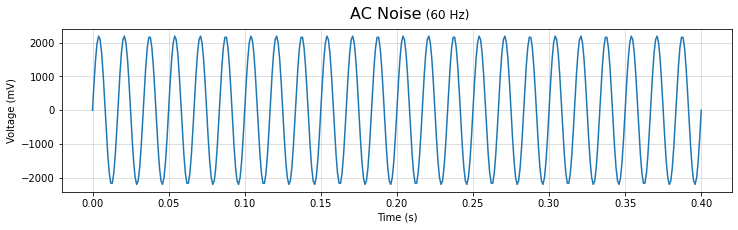

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt

start = 0
end = 0.4
dn = 401  # !!sampling rate : 1000 Hz

x = np.linspace(start,end,dn)
noi_data = 2200*np.sin(x*math.pi*2*60)  # 교류 전원 노이즈 (60 Hz)
plt.figure(figsize=(12,3))
plt.suptitle('AC Noise',size=16)
plt.title('                          (60 Hz)',pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(which='both',axis='both',alpha=0.5)
plt.plot(x,noi_data);

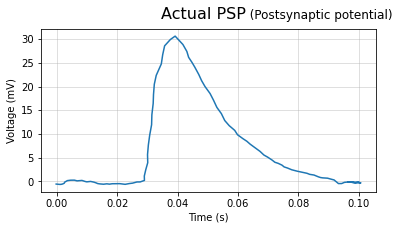

In [2]:
import csv  # psp 가정
f = open("C:/Users/enjdn/Documents/MEG_python/MEG_data_artifi/psp5.csv","rt")
reader = csv.reader(f)

col1 = []
col2 = []
for row in reader:
    col1.append(row[0])
    col2.append(row[1])

del col1[0]
del col2[0]

len(col1)

time = np.array(list(map(float, col1)))
volt = np.array(list(map(float, col2)))
plt.figure(figsize=(6, 3))  # 실제 psp 그래프
plt.suptitle('Actual PSP',size=16)
plt.title('                                                          (Postsynaptic potential)',pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(which='major',axis='both',alpha=0.5)
plt.plot(time,volt);

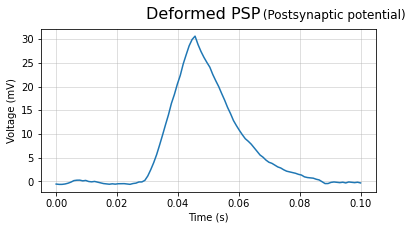

In [3]:
n = 104
x_2 = np.linspace(0,0.1,n)  # scale 조정을 위해 변형된 psp 그래프
plt.figure(figsize=(6, 3))
plt.suptitle('Deformed PSP',size=16)
plt.title('                                                                 (Postsynaptic potential)',pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(which='major',axis='both',alpha=0.5)
plt.plot(x_2,volt);

401

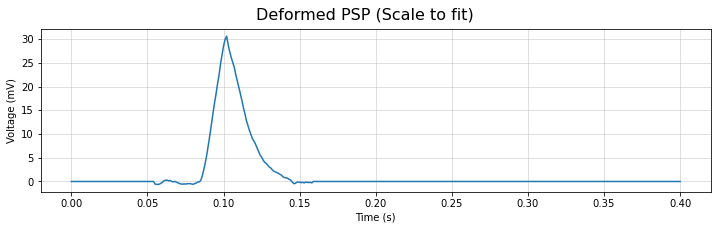

In [4]:
c = np.zeros(shape=(55,), dtype=np.int8)  # signal 0.01 s 로 
volt_1 = np.concatenate((c, volt), axis=None)
d = np.zeros(shape=(242,), dtype=np.int8)
volt_2 = np.concatenate((volt_1, d), axis=None)

plt.figure(figsize=(12,3))
plt.suptitle('Deformed PSP (Scale to fit)',size=16)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(which='major',axis='both',alpha=0.5)
plt.plot(x,volt_2);  # noise와 scale 맞추기
len(volt_2)

In [5]:
# Biot-Savart Law에 따른 signal 자기장

n,m = 9, 9
sensor_array = np.zeros((n,m), dtype = np.ndarray)  # n X m 채널 sensor의 위치
for i in range(n):
    for j in range(m):
        sensor_array[i,j] = np.array([4*(i-(n-1)/2),4*(j-(m-1)/2),4])  # [0,0]으로 위치 세팅 & 채널 간격 4cm

sig = np.array([1,1,0])  # signal의 방향 및 크기 (4 cm 로 가정)
noi_20 = np.array([0,20000,4])  # noise의 위치(20 m로 가정)  


dl_vec_sig = sig/np.linalg.norm(sig)  # signal의 단위 벡터

R_sig = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor 채널과 signal이 떨어진 거리 R
for i in range(n):
    for j in range(m):
        R_sig[i,j] = np.linalg.norm(sensor_array[i,j])

a_R_sig = sensor_array/R_sig  # 각각의 sensor 채널을 향하는 R의 단위벡터 a_R

H_vec_sig = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor에 들어오는 signal 벡터의 크기
for i in range(n):
    for j in range(m):
        H_vec_sig[i,j] = np.cross(dl_vec_sig,a_R_sig[i,j])


H_sig = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor에 들어오는 최종 signal의 자기장 (with Biot-Savart Law) 
for i in range(n):
    for j in range(m):
        g_noise = np.random.randn(401)  # 가우시안 noise 생성 
        H_sig[i,j]  = (float(H_vec_sig[i,j][2])/((4*np.pi)*float(R_sig[i,j])**2))*volt_2 + g_noise*0.001
      
    
R_noi_20 = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor 채널과 noise가 떨어진 거리 R (20 m)
for i in range(n):
    for j in range(m):
        R_noi_20[i,j] = np.linalg.norm(sensor_array[i,j]-noi_20)

H_noi_20 = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor에 들어오는 최종 noise의 자기장 (with Biot-Savart Law) (20 m)
for i in range(n):
    for j in range(m):
        H_noi_20[i,j] = noi_data/(2*np.pi*R_noi_20[i,j])

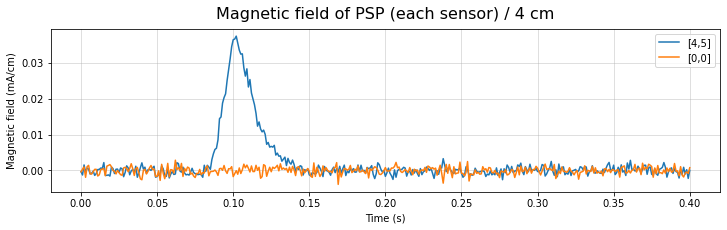

In [6]:
plt.figure(figsize=(12, 3)) # Sensor에 들어오는 최종 signal의 자기장 (with Biot-Savart Law) + 각 채널에 가우시안 noise 
plt.title('Magnetic field of PSP (each sensor) / 4 cm',size=16, pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic field (mA/cm)')
plt.grid(which='both',axis='both',alpha=0.5)
plt.plot(x,H_sig[4,5], label='[4,5]')  # Sensor[4,5]에서 signal
plt.plot(x,H_sig[0,0], label='[0,0]')  # Sensor[0,0]에서 signal
plt.legend();

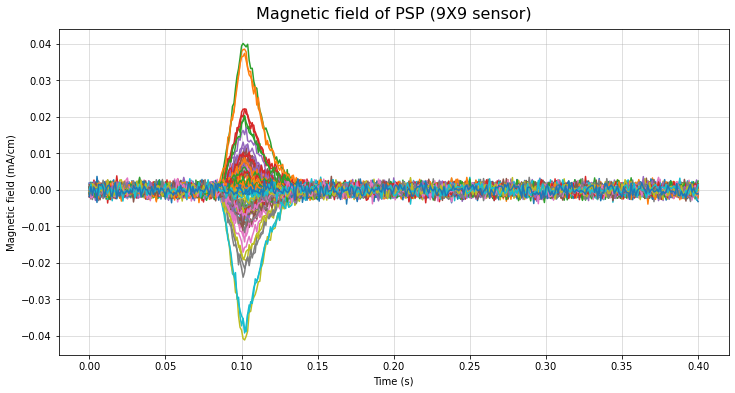

In [7]:
plt.figure(figsize=(12, 6)) # 9 X 9 Sensor에 들어오는 최종 signal의 자기장
plt.title('Magnetic field of PSP (9X9 sensor)',size=16, pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic field (mA/cm)')
plt.grid(which='both',axis='both',alpha=0.5)
for i in range(n):
    for j in range(m):
        plt.plot(x,H_sig[i,j])

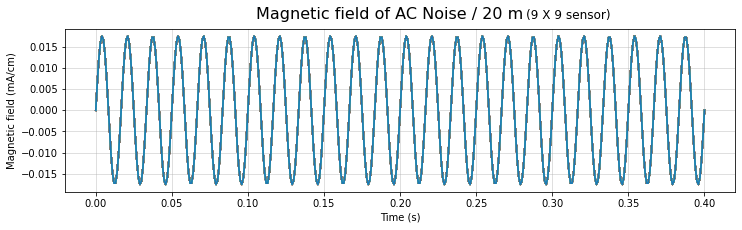

In [8]:
plt.figure(figsize=(12, 3))  # 각각의 sensor 채널과 noise가 떨어진 거리 R (20 m)
plt.suptitle('Magnetic field of AC Noise / 20 m',size=16)
plt.title('                                                                                       (9 X 9 sensor)',pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic field (mA/cm)')
plt.grid(which='both',axis='both',alpha=0.5)
for i in range(n):
    for j in range(m):
        plt.plot(x,H_noi_20[i,j])

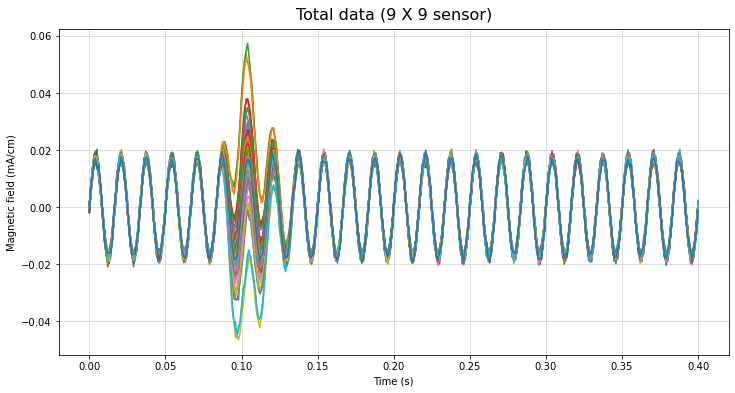

In [9]:
plt.figure(figsize=(12, 6))  # 각각의 sensor 에서 받아들인 총 데이터 (20 m)
plt.title('Total data (9 X 9 sensor)',size=16, pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic field (mA/cm)')
plt.grid(which='both',axis='both',alpha=0.5)
for i in range(n):
    for j in range(m):
        plt.plot(x, H_sig[i,j] + H_noi_20[i,j])

In [10]:
H_all_f_20 = []  # 각각의 sensor 에서 받아들인 총 신호  (20 m)
for i in range(n):
    for j in range(m):
        H_all_f_20.append(list(H_sig[i,j] + H_noi_20[i,j]))
len(H_all_f_20)

81

In [11]:
import pandas as pd

# frame = pd.DataFrame(H_all_f)

start = 0
end = 0.4
dn = 401  # !!sampling rate : 1000 Hz
x = np.linspace(start,end,dn)

indexName_col = x  # Data frame에 각 센서별 데이터 기록
indexName = []
for i in range(n*m):
    indexName.append('Sensor_'+str(i+1))
df = pd.DataFrame(H_all_f_20, columns = indexName_col,index = indexName)
df

,0.000,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,...,0.391,0.392,0.393,0.394,0.395,0.396,0.397,0.398,0.399,0.400
Sensor_1,-0.000392,0.006800,0.012943,0.013917,0.018510,0.018058,0.012574,0.007414,0.001857,-0.004039,...,0.004128,-0.002307,-0.009933,-0.012424,-0.017927,-0.019293,-0.016559,-0.012393,-0.007273,0.000760
Sensor_2,-0.000621,0.006970,0.011923,0.015171,0.019306,0.016188,0.013625,0.007491,0.003072,-0.003010,...,0.004054,-0.002687,-0.008178,-0.012992,-0.016911,-0.018183,-0.016837,-0.011937,-0.005552,0.000003
Sensor_3,0.000359,0.007305,0.011293,0.014812,0.016600,0.017338,0.011131,0.008901,0.003000,-0.004290,...,0.003982,-0.003166,-0.008814,-0.011797,-0.015053,-0.016668,-0.015909,-0.011146,-0.004626,0.001647
Sensor_4,0.000532,0.008406,0.011805,0.015547,0.019307,0.016149,0.014430,0.008039,0.000290,-0.004774,...,0.004888,-0.003133,-0.008741,-0.014905,-0.016588,-0.018058,-0.015243,-0.012701,-0.005843,-0.002239
Sensor_5,-0.001994,0.005729,0.011916,0.014953,0.018345,0.015307,0.012893,0.008277,0.003016,-0.002772,...,0.003462,-0.003174,-0.007139,-0.014501,-0.016548,-0.018526,-0.014788,-0.010680,-0.003731,-0.000800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sensor_77,-0.000319,0.004203,0.009904,0.016430,0.016983,0.016032,0.012307,0.007566,0.001113,-0.004549,...,0.003312,-0.002185,-0.008257,-0.014248,-0.016386,-0.016768,-0.017934,-0.010794,-0.007104,-0.000549
Sensor_78,-0.000183,0.005580,0.010957,0.015299,0.017235,0.015831,0.014253,0.007644,0.001299,-0.001693,...,0.002998,-0.002703,-0.006168,-0.012239,-0.015737,-0.016467,-0.016703,-0.011406,-0.006537,0.001474
Sensor_79,-0.000428,0.005537,0.013704,0.017172,0.018107,0.017235,0.015054,0.008434,0.001894,-0.003797,...,0.003768,-0.002743,-0.007497,-0.013619,-0.018032,-0.015915,-0.016989,-0.013470,-0.007108,0.000063
Sensor_80,0.000078,0.007916,0.011813,0.015741,0.016543,0.016905,0.012031,0.009368,0.002432,-0.002858,...,0.003150,-0.002308,-0.009817,-0.014299,-0.016093,-0.017753,-0.017534,-0.012218,-0.006896,0.001390


In [12]:
from sklearn.preprocessing import StandardScaler
for i in range(401):
    indexName_col[i] = indexName_col[i]
time = indexName_col

Sensor_x = df.loc[:,time].values
    
x_std = StandardScaler().fit_transform(Sensor_x.T)
x_std.shape

(401, 81)

In [13]:
time_f = x_std.T
covariance_matrix = np.cov(time_f)
# np.set_printoptions(threshold=np.inf,linewidth=np.inf)  # '...' 생략 없이 출력
covariance_matrix.shape

(81, 81)

In [14]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [15]:
# 주성분별 데이터를 설명하는 정도 (10000% 기준)

print('PC1 = ',round(float(eig_vals[0]/sum(eig_vals))*10000,2),'%')
print('PC2 = ',round(float(eig_vals[1]/sum(eig_vals))*10000,2),'%')
print('PC3 = ',round(float(eig_vals[2]/sum(eig_vals))*10000,2),'%')
print('PC4 = ',round(float(eig_vals[3]/sum(eig_vals))*10000,2),'%')

PC1 =  9600.13 %
PC2 =  338.5 %
PC3 =  1.61 %
PC4 =  1.56 %


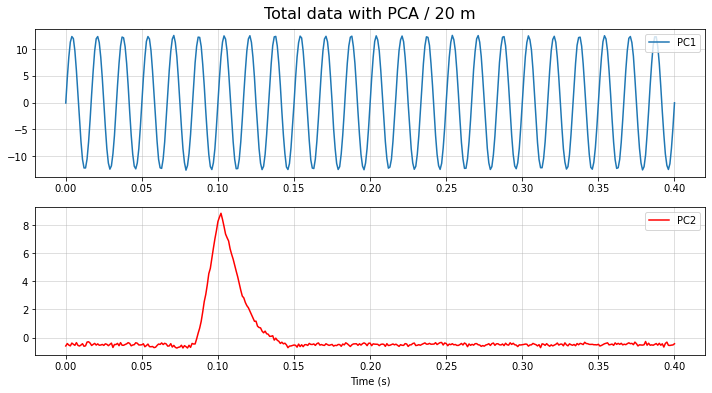

In [18]:
plt.figure(figsize=(12,6)) 
plt.subplot(2,1,1)
plt.title('Total data with PCA / 20 m',size=16, pad=10)
plt.grid(which='both',axis='both',alpha=0.5)
x_pc1 = x_std.dot(eig_vecs.T[0])
plt.plot(time,x_pc1.T,label='PC1')
plt.legend(loc='upper right')

plt.subplot(2,1,2)
plt.xlabel('Time (s)')
plt.grid(which='both',axis='both',alpha=0.5)
x_pc2 = x_std.dot(eig_vecs.T[1])
plt.plot(time,x_pc2.T, color='red',label='PC2')
plt.legend(loc='upper right');

In [17]:
eig_vals

array([7.79554506e+01, 2.74866985e+00, 1.30603573e-02, 1.26370296e-02,
       1.22368063e-02, 1.15934280e-02, 1.12239737e-02, 1.08847595e-02,
       1.07574693e-02, 1.05818505e-02, 1.03129140e-02, 1.01355328e-02,
       1.00140121e-02, 9.74714459e-03, 9.67004622e-03, 9.26618274e-03,
       9.45515094e-03, 9.02731891e-03, 8.76593405e-03, 8.70899953e-03,
       8.53541140e-03, 2.00311481e-03, 2.12308901e-03, 8.49437979e-03,
       2.22196307e-03, 8.17776482e-03, 7.93205735e-03, 7.77651000e-03,
       7.80756569e-03, 2.45634054e-03, 7.48114434e-03, 7.51101609e-03,
       2.54686061e-03, 2.65499619e-03, 7.37488739e-03, 7.19832595e-03,
       7.18302408e-03, 2.75264252e-03, 2.83348676e-03, 2.85557110e-03,
       6.94486971e-03, 6.83619646e-03, 6.77102307e-03, 6.70014005e-03,
       2.94624180e-03, 6.58137985e-03, 6.49543534e-03, 3.11310027e-03,
       6.24786481e-03, 6.23398381e-03, 3.08189319e-03, 3.28632014e-03,
       3.27138097e-03, 3.34156130e-03, 3.51064426e-03, 6.08922057e-03,
      